# Tâche 7 : Diffraction


In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen import Lattice, Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import numpy as np

In [8]:
with MPRester("P0mh8HMc3qiSX5g1") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-24504")
    
data = m.get_data("mp-24504")[0]
cif = data.get('cif')


In [9]:
view = quick_view(structure)
display(view)

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [10]:
XRD = XRDCalculator()
xrd = XRD.get_pattern(structure, two_theta_range=(0, 90))

In [11]:
#Les paramètres de maille
index_a = cif.find("_cell_length_a")
index_b = cif.find("_cell_length_b")
index_c = cif.find("_cell_length_c")
a = float(cif[index_a+17:index_a+27])
b = float(cif[index_b+17:index_b+27])
c = float(cif[index_c+17:index_c+27])
print("Les paramètres de maille sont (en ångström) : ")
print("   a = " + str(a))
print("   b = " + str(b))
print("   c = " + str(c))

Les paramètres de maille sont (en ångström) : 
   a = 3.76195423
   b = 3.76195423
   c = 4.534819


In [12]:
#Plein de fonctions utiles pour la suite
def hkil(i):
    "Extraction des valeurs de h k i l à partir de XRDCalculator().get_pattern()"
    hkil = []
    for j in range(4):
        hkil.append(xrd.hkls[i][0].get('hkl')[j])
    return hkil

def d(h,k,l):
    """ Calcule de la distance inter-plan pour une maille hexagonale"""
    d = 1/np.sqrt((4/3)*((h**2 + h*k + k*k)/a**2) + (l**2)/c**2)
    return d

def theta(d):
    """ Calcule du theta de la difraction pour un certain d selon la formule <<2d = lamda sin theta>> """
    lamda = 1.54060
    sin_theta = (lamda)/(2*d)
    theta_rad = np.arcsin(sin_theta)
    theta_deg = theta_rad * (180/np.pi)
    return theta_deg

def calc(h, k, l):
    """Calcule et print les valeurs de d et theta calculées avec les 2 fonctions précédentes"""
    print("Les valeurs calculées sont : ")
    d_hkl = d(h,k,l)
    print("   d_"+str(h)+str(k)+str(l)+" = "+str(d_hkl))
    theta_hkl = theta(d_hkl)
    print("   theta_"+str(h)+str(k)+str(l)+" = "+str(theta_hkl))
    print("   2 theta_"+str(h)+str(k)+str(l)+" = "+str(2*theta_hkl))
    
def compare(i):
    print(" ")
    print("Nous retrouvons bien les valeurs fournies par XRDCalculator().get_pattern()")
    print("   d = "+str(xrd.d_hkls[i]))
    print("   2 theta = "+str(xrd.x[i]))

def intensity(i):
    "Retrouver l'amplitude des pics à partir de XRDCalculator().get_pattern()"
    print(" ")
    print("Nous pouvons aussi trouver l'intensité du pic de diffraction")
    print("   Amplitude = "+str(xrd.y[i]))

# Premier pic

In [13]:
hkil1 = hkil(0)
h1 = hkil1[0]
k1 = hkil1[1]
l1 = hkil1[3]

print("Pour les plans (hkl) = " + "("+str(h1) + " " + str(k1) + " " + str(l1) + ")\n")

calc(h1,k1,l1)
compare(0)
intensity(0)

Pour les plans (hkl) = (1 0 0)

Les valeurs calculées sont : 
   d_100 = 3.257947931054327
   theta_100 = 13.67635437639789
   2 theta_100 = 27.35270875279578
 
Nous retrouvons bien les valeurs fournies par XRDCalculator().get_pattern()
   d = 3.2579480000000003
   2 theta = 27.375152258080604
 
Nous pouvons aussi trouver l'intensité du pic de diffraction
   Amplitude = 52.25687103954074


# Deuxième pic


In [14]:
hkil2 = hkil(1)
h2 = hkil2[0]
k2 = hkil2[1]
l2 = hkil2[3]

print("Pour les plans (hkl) = " + "("+str(h2) + " " + str(k2) + " " + str(l2) + ")\n")

calc(h2,k2,l2)
compare(1)
intensity(1)

Pour les plans (hkl) = (1 0 1)

Les valeurs calculées sont : 
   d_101 = 2.645905580433956
   theta_101 = 16.92556318723687
   2 theta_101 = 33.85112637447374
 
Nous retrouvons bien les valeurs fournies par XRDCalculator().get_pattern()
   d = 2.6459056173655133
   2 theta = 33.87919429339319
 
Nous pouvons aussi trouver l'intensité du pic de diffraction
   Amplitude = 100.0


# Troisième pic

In [15]:
hkil3 = hkil(2)
h3 = hkil3[0]
k3 = hkil3[1]
l3 = hkil3[3]

print("Pour les plans (hkl) = " + "("+str(h3) + " " + str(k3) + " " + str(l3) + ")\n")

calc(h3,k3,l3)
compare(2)
intensity(2)

Pour les plans (hkl) = (0 0 2)

Les valeurs calculées sont : 
   d_002 = 2.2674095
   theta_002 = 19.8602362087033
   2 theta_002 = 39.7204724174066
 
Nous retrouvons bien les valeurs fournies par XRDCalculator().get_pattern()
   d = 2.2674095
   2 theta = 39.75378952002108
 
Nous pouvons aussi trouver l'intensité du pic de diffraction
   Amplitude = 3.63282791458631


# Diffraction patterns

Nous pouvons retrouver tous ces éléments sur le graphe suivant

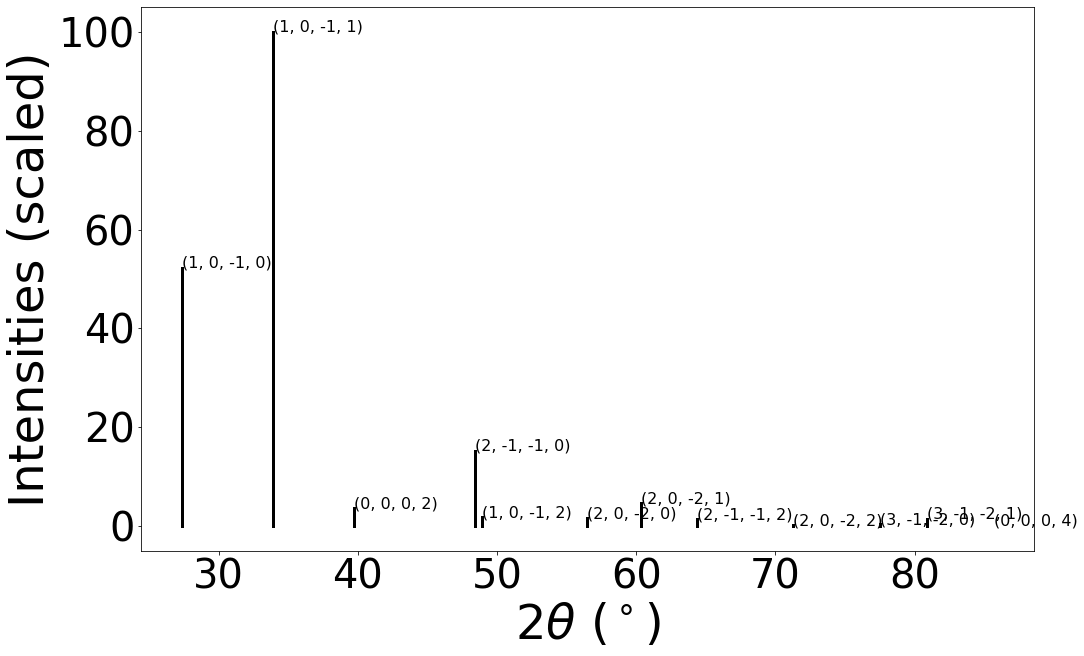

In [16]:
XRD.show_plot(structure)